## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [66]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Visualisation

Here are the few scatterplots of the categorical features through which we can identifiy if the mushrooms are poisonous or eatable

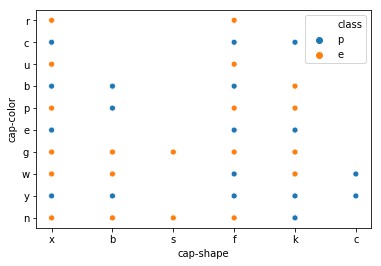

In [68]:
sns.scatterplot(x='cap-shape',y='cap-color',data=data,hue='class')

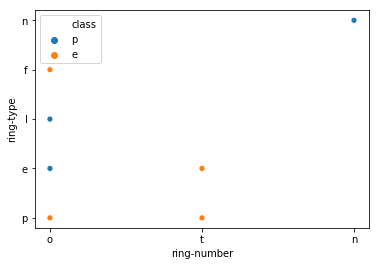

In [69]:
sns.scatterplot(x='ring-number',y='ring-type',data=data,hue='class')

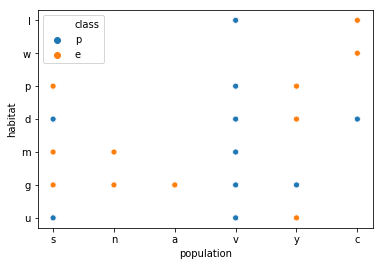

In [70]:
sns.scatterplot(x='population',y='habitat',data=data,hue='class')

You can observe from the above graph that all the mushrooms from population 'v' are POISONOUS

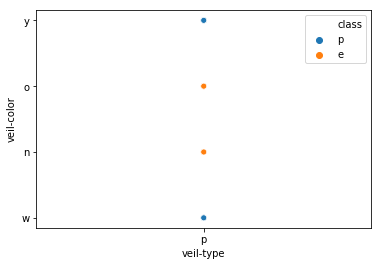

In [71]:
sns.scatterplot(x='veil-type',y='veil-color',data=data,hue='class')

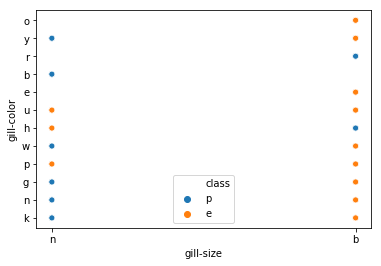

In [72]:
sns.scatterplot(x='gill-size',y='gill-color',data=data,hue='class')

In [4]:
y = data['class']

In [19]:
X = data.drop('class',axis=1)

In [20]:
X = pd.get_dummies(X,drop_first=True)

In [30]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Dividing the data for Training and Testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Importing Naive-Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb = GaussianNB(var_smoothing=1e-02)

In [55]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=0.01)

In [56]:
pred_gnb = gnb.predict(X_test)

## Evaluation

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
print(confusion_matrix(y_test,pred_gnb))
print(accuracy_score(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

[[1217   18]
 [   3 1200]]
0.9913863822805579
              precision    recall  f1-score   support

           e       1.00      0.99      0.99      1235
           p       0.99      1.00      0.99      1203

   micro avg       0.99      0.99      0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



## Importing Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=500)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
pred_rfc = rfc.predict(X_test)

## Evaluation

In [64]:
print(confusion_matrix(y_test,pred_rfc))
print(accuracy_score(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[1235    0]
 [   0 1203]]
1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1235
           p       1.00      1.00      1.00      1203

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Note : I also tried it using Support Vector Machine (SVM), by using 'rbf' kernel I got an accuracy of 99% just as Naive-Bayes and by using 'linear' kernel I got 100% accuracy just as Random Forest